# 1. Generate a series (𝑋𝑖, 𝑌𝑖 ) for 𝑖 = 1, ... , 𝑛 of Bivariate-Normally distributed random vectors, with the mean vector of (0,0) and the variance – covariance matrix of (3 𝑎 𝑎 5). Estimate the correlation between X and Y, by computing:

In [2]:
import numpy as np
import random
import math
import matplotlib.pyplot as plt
import pandas as pd

In [6]:
def LGM_uniform_generator(n):
    a=7**5
    b=0
    m=(2**31)-1
    x_n= random.randint(0,m-1)
    LGM_lst=[x_n]
    for i in range(0,n-1):
        u_n1= (LGM_lst[i]*a+b)%m
        LGM_lst.append(u_n1)
    uni_LGM = []
    for j in range(len(LGM_lst)):
        uni_n = LGM_lst[j]/m
        uni_LGM.append(uni_n)
    return np.array(uni_LGM)

In [7]:
def normal_generator_box_muller(n):
    seq_1 = LGM_uniform_generator(int(n/2)) 
    seq_2 = LGM_uniform_generator(int(n/2)) 
    Z_1 = np.sqrt(-2*np.log(seq_1))*np.cos(2*np.pi*seq_2)
    Z_2 = np.sqrt(-2*np.log(seq_1))*np.sin(2*np.pi*seq_2) 
    return np.concatenate((Z_1,Z_2))

In [8]:
normal_generator_box_muller(1000)

array([ 1.72118793e+00,  1.09942413e+00, -3.71095915e-01,  9.86215182e-01,
        5.17326288e-01, -1.47181457e+00, -6.22514427e-01,  1.24241736e-01,
       -1.45859492e+00,  1.60163736e-01,  5.30271459e-01,  1.13064293e+00,
        1.37940397e+00, -1.61642818e-01, -1.08852125e+00,  1.42407679e+00,
       -5.45496279e-01, -4.64524642e-02,  5.43571403e-01, -1.15813106e-02,
        3.77469010e-01,  2.04453432e-01,  2.95434700e-01, -1.69211821e+00,
        7.40398793e-01, -7.71829972e-01,  1.71697320e+00, -3.68360675e-01,
       -6.24711475e-01, -4.09345707e-01,  1.52389445e-01, -1.27984505e+00,
       -7.58228346e-01,  9.37074607e-02, -1.74515300e+00,  5.73475773e-01,
        6.43175943e-01, -1.87885524e+00, -3.94122252e-01,  4.88111626e-01,
       -1.90397460e+00,  5.63630219e-01, -4.01925326e-01, -2.26524868e-01,
       -1.16434890e+00, -3.20600332e-01, -1.35301464e+00,  1.33326869e+00,
        6.18570808e-01,  5.45379206e-01, -4.02937149e-01,  6.15641338e-01,
        2.01049930e-01, -

In [448]:
def corr(a):
    z_1 = normal_generator_box_muller(1000)
    z_2 = normal_generator_box_muller(1000)
    sigma = [
              [3,a],
              [a, 5]
            ]
    L = np.linalg.cholesky(sigma)
    x_1 = np.array(0+(L[0][0]*z_1))
    x_2 = np.array(0+(L[1][0]*z_1)+(L[1][1]*z_2))
    x_hat = (1/1000)*(np.sum(x_1))
    y_hat = (1/1000)*(np.sum(x_2))
    nominator = (1/(1000-1))*(np.sum((x_1-x_hat)*(x_2-y_hat)))
    denominator = np.sqrt((1/(1000-1))*np.sum((x_1-x_hat)**2))*np.sqrt((1/(1000-1))*np.sum((x_2-y_hat)**2))
    rou = nominator/denominator
    return rou

In [449]:
rou_1 = corr(-0.7)
rou_1

-0.17467714796668424

# 2. Evaluate the following expected values by using Monte Carlo simulation: E=Ε [max (0, (𝑌3 + sin(𝑌) + 𝑋2𝑌) )] where X and Y have 𝑁(0,1) distribution and a correlation of 𝜌 = 0.6.

In [450]:
def monte_carlo(rou):
    Z_1 = normal_generator_box_muller(1000)
    Z_2 = normal_generator_box_muller(1000)
    x = Z_1
    y = rou*Z_1 + (np.sqrt((1-rou**2)))*Z_2
    formula = y**3+np.sin(y)+(x**2*y)
    E = []
    for i in formula:
        expectation = max(0,i)
        E.append(expectation)
    return np.mean(E)

In [451]:
monte_carlo(0.6)

1.4651538154768025

# 3(a) Estimate the following expected values by simulation:

In [452]:
def w_ev(t):
    z = normal_generator_box_muller(1000)
    w = z*np.sqrt(t)
    a_t = w**2+np.sin(w)
    b_t = np.exp(t/2)*np.cos(w)
    return np.mean(a_t),np.mean(b_t)

In [453]:
w_ev(1)

(1.0159352959882837, 0.9728967571663497)

In [454]:
w_ev(3)

(2.9160335542029014, 1.018202909559367)

In [455]:
w_ev(5)

(4.839240165158674, 1.0651864293251816)

In [831]:
lst_a = []
for i in range(1000):
    lst_a.append(w_ev(5)[0])

In [832]:
np.std(lst_a)

0.2214176809188773

# (b) How are the values of 𝐵(𝑡) (for the cases 𝑡 = 1, 3, 5) related?

# (c) Now use a variance reduction technique (whichever one you want) to compute the expected value 𝐴(𝑡) for the case 𝑡 = 5. Do you see any improvements? Comment on your findings.

In [833]:
def vr_ev(t):
    z = normal_generator_box_muller(1000)
    w = z*np.sqrt(t)
    negative_w = -w
    a_t_1 = w**2+np.sin(w)
    a_t_2 = (-w)**2+np.sin(-w)
    a_t = np.concatenate((a_t_1,a_t_2))
    b_t_1 = np.exp(t/2)*np.cos(w)
    b_t_2 = np.exp(t/2)*np.cos(-w)
    b_t = np.concatenate((b_t_1,b_t_2))
    return np.mean(a_t),np.mean(b_t)

In [836]:
lst_a_t = []
for i in range(1000):
    lst_a_t.append(vr_ev(5)[0])

In [837]:
np.mean(lst_a_t),np.std(lst_a_t)

(5.013698879042405, 0.21879704330402505)

# 4. Let 𝑆𝑡 be a Geometric Brownian Motion process: 𝑆𝑡 = 𝑆0𝑒(𝜎𝑊𝑡+(𝑟−𝜎2 2 )𝑡), where 𝑟 = 0.05, 𝜎 = 0.28, 𝑆0 = 100, 𝑊𝑡 is a Standard Brownian Motion process (Standard Wiener process).

In [847]:
def S_t(S_0,t,sigma,r):
    z = normal_generator_box_muller(1000)
    w_t = z*np.sqrt(t)
    S_t = S_0*np.exp((sigma*w_t)+(r-(sigma**2/2))*t)
    return S_t

In [848]:
def C_t(S_0,t,sigma,r,X):
    payoff = S_t(S_0,t,sigma,r)-X
    lst = []
    for i in payoff:
        payoff_f = max(0,i)
        lst.append(payoff_f)
    c_t = np.exp(-r*t)*np.mean(lst)
    return c_t  

In [849]:
C_t(100,5,0.28,0.05,110)

29.986240348352784

In [825]:
c_t_lst = []
for i in range(1000):
    c_t_lst.append(C_t(100,5,0.28,0.05,110))

In [826]:
np.std(c_t_lst)

1.828553498195205

# (b) Compute the exact value of the option c by the Black-Scholes formula.

In [459]:
def black_scholes_call(S, K, T, r, sigma):
    d1 = (math.log(S/K) + (r + sigma**2 / 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    Nd1 = 0.5 + 0.5 * math.erf(d1 / math.sqrt(2))
    Nd2 = 0.5 + 0.5 * math.erf(d2 / math.sqrt(2))
    call_price = S * Nd1 - K * math.exp(-r * T) * Nd2
    return call_price

In [460]:
black_scholes_call(100,110,5,0.05,0.28)

30.649382950089553

# c) Now use variance reduction techniques (whichever one you want) to estimate the price of the option of part (a) again. Did the accuracy improve? Comment.

In [793]:
def negative_s_t(S_0,t,sigma,r):
    z = normal_generator_box_muller(1000)
    w_t = z*np.sqrt(t)
    S_t_2 = S_0*np.exp((sigma*-w_t)+(r-(sigma**2/2))*t)
    return S_t_2

In [796]:
def vr_C_t(S_0,t,sigma,r,X):
    payoff = S_t(S_0,t,sigma,r)-X
    payoff_n = negative_s_t(S_0,t,sigma,r)-X
    lst = []
    for i in range (len(payoff)):
        payoff_f = max(0,payoff[i])
        lst.append(payoff_f)
        payoff_ff = max(0,payoff_n[i])
        lst.append(payoff_ff)
    c_t_2 = np.exp(-r*t)*np.mean(lst)
    return np.mean(c_t_2) 

In [809]:
lst=[]
for i in range(1000):
    lst.append(vr_C_t(100,5,0.28,0.05,110))
np.mean(lst)

30.766177414633173

In [810]:
np.std(lst)

1.2865094013764191

# 5. (a) For each integer number 𝑛 from 1 to 10, use 1000 simulations of 𝑆𝑛 to estimate 𝐸𝑆𝑛, where 𝑆𝑡 is a Geometric Brownian Motion process: 𝑆𝑡 = 𝑆0𝑒(𝜎𝑊𝑡+(𝑟−𝜎2 2 )𝑡), where 𝑟 = 0.05, 𝜎 = 0.28, 𝑆0 = 100. Plot all of the above end 𝐸(𝑆𝑛 ), for 𝑛 ranging from 1 to 10, in one graph.

In [872]:
def S_n(S_0,t,sigma,r):
    w_t = 0
    S_0 = S_0
    lst=[]
    for i in range (t):
        z = normal_generator_box_muller(1000)
        w_t = z*1
        S_0 = S_n
        S_n = S_0*np.exp((sigma*w_t)+(r-(sigma**2/2))*1)
        lst.append(np.mean(S_n))
    return lst

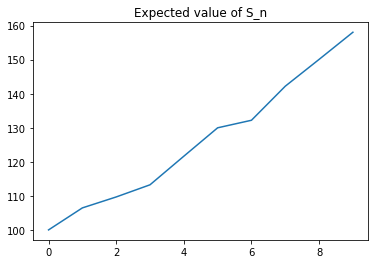

In [873]:
plt.plot(S_n_plot(100,10,0.28,0.05))
plt.title('Expected value of S_n')
plt.show()

# (b) Now simulate 6 paths of 𝑆𝑡 for 0 ≤ 𝑡 ≤ 10 (defined in part (a)) by dividing up the interval [0,10] into 1,000 equal parts.

In [890]:
def s_n_6path(S_0,t,sigma,r,path):
    data = np.zeros((1000, 6))
    df = pd.DataFrame()
    for i in range (1,path+1):
        df.loc[0,i] = S_0
        w_t = 0
        z = normal_generator_box_muller(1000)
        for j in range (1,1000):
            delta_t = t/1000
            w_t = z[j]*np.sqrt(delta_t)
            df.loc[j,i] = df.loc[j-1,i]*np.exp((sigma*w_t)+(r-(sigma**2/2))*delta_t)
    return df

In [891]:
df = s_n_6path(100,10,0.28,0.05,6)

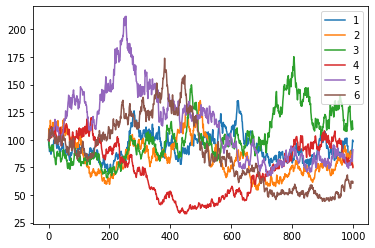

In [892]:
df.plot()
plt.show()

# (c) Plot your data from parts (a) and (b) in one graph.

In [877]:
df.index = [i/100 for i in df.index]

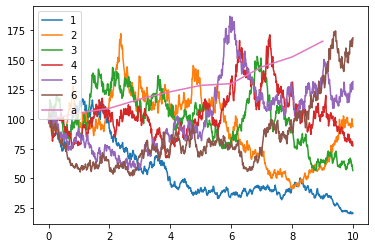

In [878]:
plt.plot(df)
plt.plot(S_n_plot(100,10,0.28,0.05))
plt.legend([1,2,3,4,5,6,'a'])
plt.show()

# (d) What would happen to the 𝐸𝑆𝑛 graph if you increased 𝜎 from 28% to 38%? What would happen to the 6 plots of 𝑆𝑡 for 0 ≤ 𝑡 ≤ 10, if you increased 𝜎 from 28% to 38%?

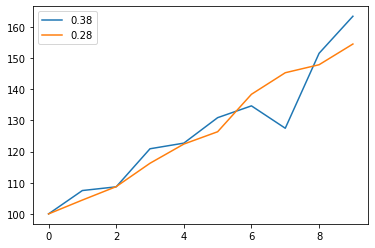

In [904]:
plt.plot(S_n_plot(100,10,0.38,0.05))
plt.plot(S_n_plot(100,10,0.28,0.05))
plt.legend(['0.38','0.28'])
plt.show()

In [888]:
df1 = s_n_6path(100,10,0.38,0.05,6)
df.reset_index(inplace=True)
df.drop(columns = 'index',inplace = True)

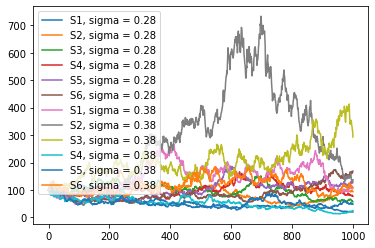

In [889]:
plt.plot(df)
plt.plot(df1)
plt.legend(['S1, sigma = 0.28','S2, sigma = 0.28','S3, sigma = 0.28','S4, sigma = 0.28','S5, sigma = 0.28','S6, sigma = 0.28','S1, sigma = 0.38','S2, sigma = 0.38','S3, sigma = 0.38','S4, sigma = 0.38','S5, sigma = 0.38','S6, sigma = 0.38'])
plt.show()

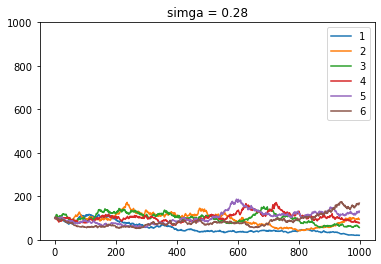

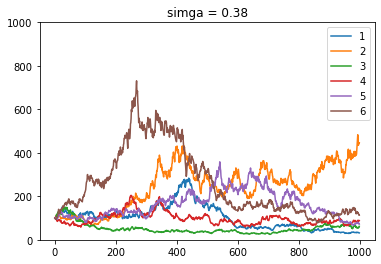

In [887]:
df.plot(ylim=[0,1000])
plt.title('simga = 0.28')
df1.plot(ylim=[0,1000])
plt.title('simga = 0.38')
plt.show()

# 6. Consider the following integral for computing the number 𝜋: 4 ∫ √1 − 𝑥2𝑑𝑥 = 𝜋.

# (a) The integral above can be estimated by a simple numerical integration using, say Euler’s discretization (or any other discretization) scheme. Estimate the integral by using the Euler’s discretization scheme.

In [754]:
def euler_scheme(n):
    delta = 1/1000
    integration = 0
    x = np.linspace(0,1,1000)
    for i in range(1,n):
        integration += np.sqrt(1-x[i-1]**2)*delta
    return integration*4

In [755]:
euler_scheme(1000)

3.140413855651285

# b) Estimate the integral by Monte Carlo simulation.

In [763]:
def monte_carlo_integration(n):
    u_1 = LGM_uniform_generator(n)
    lst = []
    for i in u_1:
        area = np.sqrt(1-i**2)*1
        lst.append(area*4)
    return np.mean(lst)    

In [770]:
monte_carlo_integration(1000)

3.143963279093745